# Data science tools and decision trees

### Notes on the Dataset

* The dataset consists of several features of stars.
* The features are:
    * Temperature (K)
    * Luminosity (L/Lo)
    * Radius (R/Ro)
    * Magnitude (Mv)
    * Star Color (white,Red,Blue,Yellow,yellow-orange etc)
    * Spectral Class (O,B,A,F,G,K,M)

### Purpose:

The purpose of making the dataset is to prove that the stars follow a certain graph in the celestial Space ,
specifically called Hertzsprung-Russell Diagram or simply HR-Diagram so that we can classify stars by plotting its features based on that graph.

### Notes on the Assessment
* Try and calculate the answers provided.

### Notes on solution
* This is divided into three sections:
  - Data science tools
  - Visualisation 
  - Decision tree classification + ensemble methods


In [1]:
# Standard import(s)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
# Load stars dataset
obs = pd.read_csv('stars.csv')

In [3]:
# Show available properties of the dataset
obs.keys()

Index(['Temperature', 'Luminosity', 'Radius', 'Magnitude', 'StarType',
       'StarColor', 'SpectralClass'],
      dtype='object')

In [4]:
# Show dataset description
obs.head()

,Temperature,Luminosity,Radius,Magnitude,StarType,StarColor,SpectralClass
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [5]:
# Drop duplicate measurements -- makes sense in this case, since measurements 
# with identical rows would imply identical dates and times, which *is* indeed
# pathological.
obs = obs.drop_duplicates()

## Data science tools (4 Marks)

This section covers 7 exercises on data handling using pandas.DataFrames.
###### 1. How many observations have been collected and how many features are listed per observation? (0.5 Mark)

In [6]:
obs.shape

(240, 7)

###### 2. Which is the color of the stars with Temperature > 30000 K ? (0.5 Mark)¶

Hints:

* Find the measurements with Temperature > 30000 K
* Find the StarColor for these measurements
* Find the unique such StarColor


In [7]:
b=obs[obs.Temperature >= 30000]
b=obs.drop(columns=['Luminosity','Radius','Magnitude','StarType','SpectralClass'])
b.head()

,Temperature,StarColor
0,3068,Red
1,3042,Red
2,2600,Red
3,2800,Red
4,1939,Red


#### 3. Which is the SpectralClass of the stars with the highest temperature? **(0.5 Mark)**
_Hints:_
1. Sort the rows by temperature
2. Show only the relevant columns
3. Show the first 5 rows



In [8]:
obs['Temperature'].describe()

count      240.000000
mean     10497.462500
std       9552.425037
min       1939.000000
25%       3344.250000
50%       5776.000000
75%      15055.500000
max      40000.000000
Name: Temperature, dtype: float64

In [9]:

a=obs[obs.Temperature>=37000]
a=obs.drop(columns=['Luminosity','Radius','Magnitude','StarType','StarColor'])
a.head()

,Temperature,SpectralClass
0,3068,M
1,3042,M
2,2600,M
3,2800,M
4,1939,M


#### 4. Which is the SpectralClass of the stars with the lowest temperature? **(0.5 Mark)**



In [10]:
c=obs[obs.Temperature>=1900]
c=obs.drop(columns=['Luminosity','StarColor','Magnitude','Radius','StarType'])
c.head()

,Temperature,SpectralClass
0,3068,M
1,3042,M
2,2600,M
3,2800,M
4,1939,M


#### 5. Which are the SpectralClasses with the highest mean value of the Magnitude? (0.5 Mark)

Hints (single line):

* Group the data by SpectralClass
* Get the mean of Magnitude
* Sort the value
* Show only the first 3 rows



In [11]:
obs.Magnitude.describe()

count    240.000000
mean       4.382396
std       10.532512
min      -11.920000
25%       -6.232500
50%        8.313000
75%       13.697500
max       20.060000
Name: Magnitude, dtype: float64

In [12]:
group=obs[obs.Magnitude>=15].groupby(['Magnitude','SpectralClass'])
group=obs.drop(columns=['Luminosity','Radius','StarColor','Temperature','StarType'])
group.head()

,Magnitude,SpectralClass
0,16.12,M
1,16.60,M
2,18.70,M
3,16.65,M
4,20.06,M


#### 6. Select only events with Temperature < 5000 K and count them grouped by SpectralClass (0.5 Mark)

In [13]:
group=obs[obs.Temperature<5000].groupby(['Temperature','SpectralClass'])
group=obs.drop(columns=['Luminosity','Radius','StarColor','Magnitude','StarType'])
group.head()

,Temperature,SpectralClass
0,3068,M
1,3042,M
2,2600,M
3,2800,M
4,1939,M


#### 7. Prepare a smaller pandas.DataFrame for visualisation and classification (see instructions below; 1 Mark)

In the next sections, on decision trees and ensemble methods, we will try to classify the star types --- 'Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant' --- based on a subset of the available features:


In [14]:
# define data and features
features = ['Temperature','Magnitude','Radius', 'Luminosity']
target   = ['StarType']
wtype = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant']


#### Therefore:

* Create a pandas.DataFrame, called dataset, which contains only the desired features and the target variable;
* Drop duplicates and NaN-values;
* Add a new column called Class containing the named StarType, i.e. from the options in wtype, corresponding to the value in the StarType column; (hint: dataset['Class'] = dataset['StarType'].apply(lambda itype: wtype[itype]))
* Shuffle the dataframe;
* Create a pandas.DataFrame, called frames, containing the first 50 observations of the dataset for each StarType
* Create a sample dataset by doing the concat of frames
* From sample panda dataframe convert into a numpy array for the inputs (called X) and target (called y);
* Flatten the converted y array; and
* Check their shapes to make sure they look alright.



In [15]:
features=obs.drop(columns=['StarType','SpectralClass','StarColor'])
target=obs.iloc[:,-3]


In [16]:
obs.dropna()

,Temperature,Luminosity,Radius,Magnitude,StarType,StarColor,SpectralClass
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [17]:
obs.drop_duplicates()

,Temperature,Luminosity,Radius,Magnitude,StarType,StarColor,SpectralClass
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


## Visualisation (3 Marks)
---
This section covers 2 exercises on visualisation using `matplotlib.pyplot`. 

#### 8. Make a scatter plot of the average Temperature and Magnitude, for each StarColor, categorised by the 6 StartType considered (2 Mark)

First, we'll define a new pandas.DataFrame (called group) containing the mean Temperature and Magnitude for each StarColor, categorised by StarType; much like in Exercise 0.


In [18]:
group = obs.query('StarType < 7').groupby(['StarType', 'StarColor'])['Temperature', 'Magnitude'].mean().reset_index()
group.head()

/opt/anaconda3/envs/daml/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,StarType,StarColor,Temperature,Magnitude
0,0,Red,2997.950000,17.563500
1,1,Red,3283.825000,12.539975
2,2,Blue,18562.833333,11.732500
3,2,Blue,19860.000000,11.340000
4,2,Blue White,14638.900000,12.121000



* Define the 2 features used as mean in the group pandasDataFrame (feat1 = ... and feat2 = ...)
* Loop over the unique, considered StarType in the group pandasDataFrame.
* Make the scatter plot using the ax.scatter method.
* Make the distributions legible, either by setting the opacity (alpha=...).
* Label X axis, and Y axis including units.
* Include a legend for the 7 star types.
* Discuss the figure.



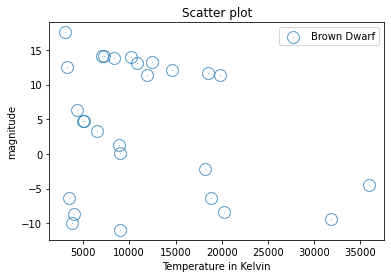

In [19]:
wtype=['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant']
feat1=group.iloc[:,2] #have selected the temp 
feat2=group.iloc[:,3] #magnitude
for i in group['StarType']:
    i=+1
plt.scatter(feat1,feat2,i,alpha=0.7,linewidth=12)
plt.legend(wtype)
plt.xlabel('Temperature in Kelvin')
plt.ylabel('magnitude')
plt.title('Scatter plot')
plt.show()

#### 9. Make a pair plot of the group pandas.DataFrame, for the 6 StarType considered (1 Mark)

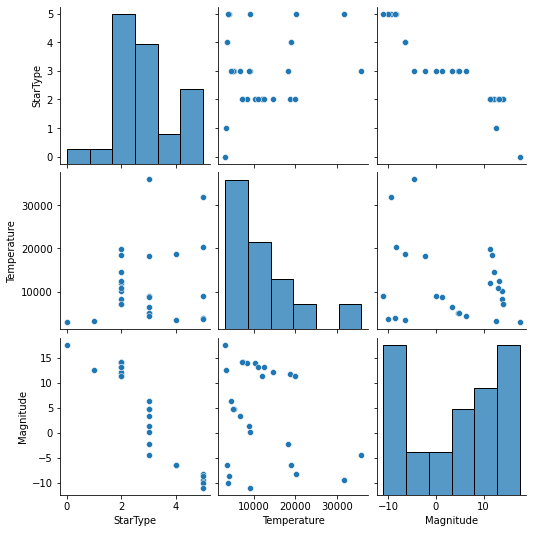

In [20]:
import seaborn as sns
sns.pairplot(group)

## Decision tree classification (3 Marks)
---
This section covers 3 exercises on the use and understanding of decision trees and ensemble methods.

#### 10. Fit a decision tree classifier and plot the decision 3 (2 Mark)

* Split dataset into training set and test set (x_train, x_test, y_train, y_test)
* Create a `sklearn.tree.DecisionTreeClassifier` and set the maximum tree depth to 4.
* Fit the decision tree classifier
* Predict the response for the test dataset
* Print the accuracy
* Make the decision tree graph and save it in png

In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing # Import preprocessing for String-Int conversion

In [22]:
# select features
features = obs.drop('StarColor', axis=1)
# select target
target = obs['StarColor']

# convert 'Star color' and 'Spectral Class' values from String to Int using LabelEncoder
features['SpectralClass'] = preprocessing.LabelEncoder().fit_transform(features['SpectralClass'])

# split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object with these parameters
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
# Train Decision Tree Classifer
dt = dt.fit(x_train,y_train)
# Predict the response for test dataset
y_pred = dt.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6527777777777778


In [23]:
export_graphviz(dt,
                out_file="tree.dot",
                rounded=True,
                filled=True
               )

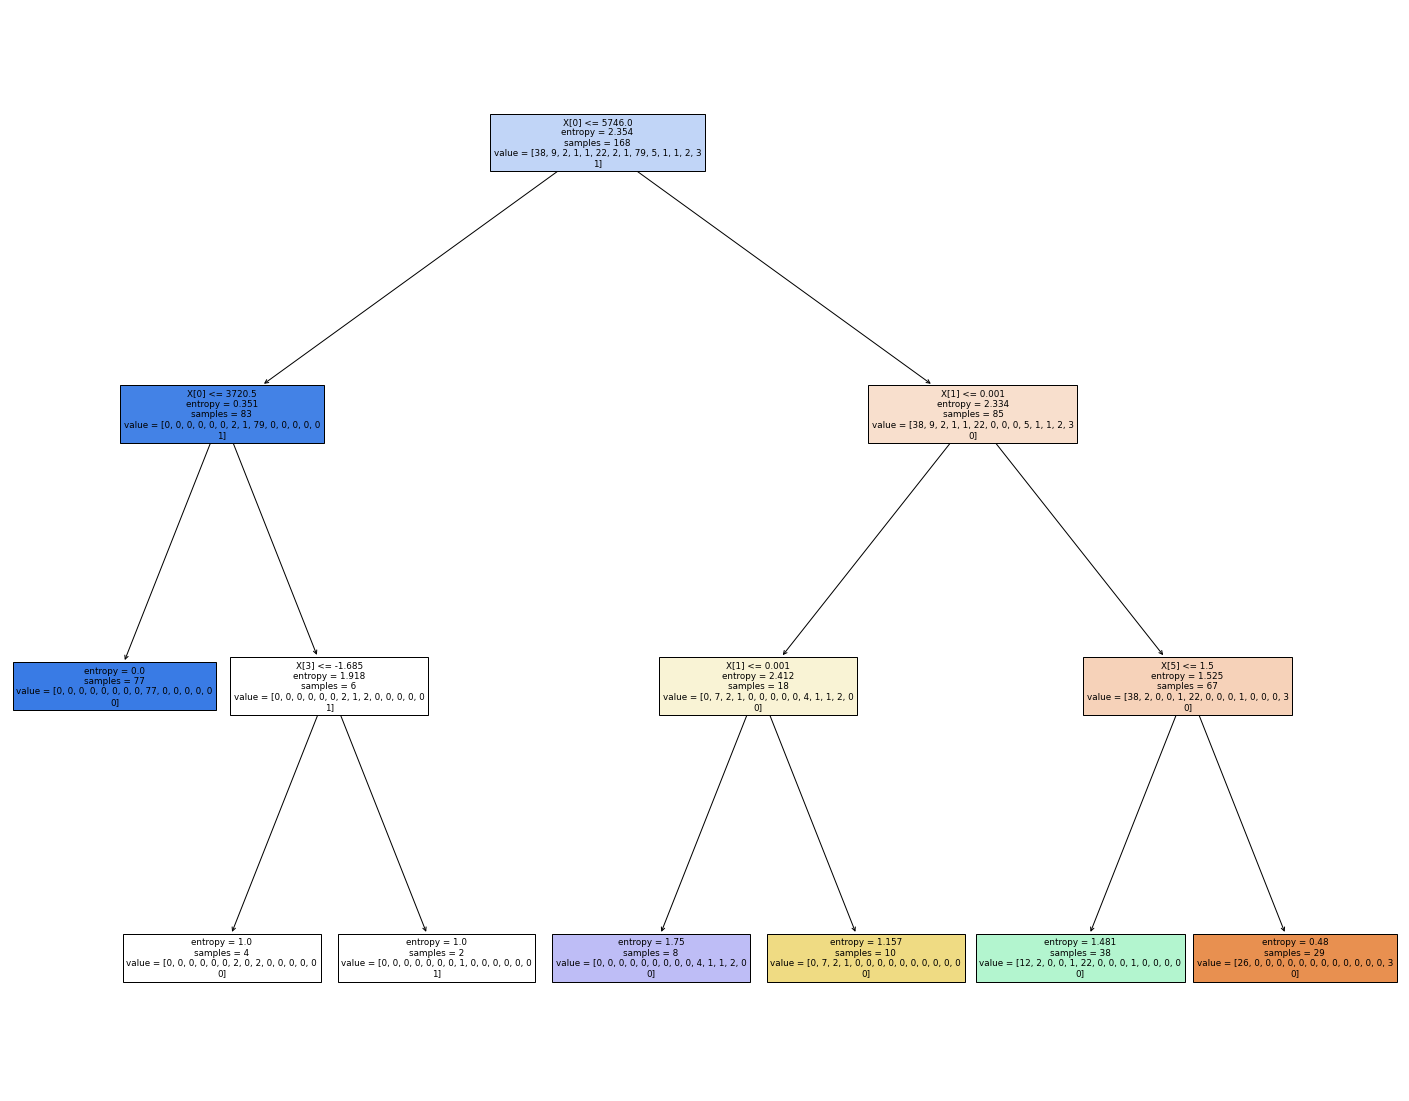

In [24]:
#save the decision_tree as png
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   filled=True)
fig.savefig("decision_tree.png")

#### 11. Fit a boosted decision tree classifier (1 Mark)

* Use the splitted dataset defined in exercise 10.
* Create a `sklearn.tree.GradientBoostingClassifier` and set the maximum tree depth to 4 and n_estimators to 20.
* Fit the boosted decision tree classifier
* Predict the response for the test dataset
* Print the accuracy

In [25]:
# here we use the Gradient boosting classifier
max_depth    =  3
n_estimators = 20

bdt = GradientBoostingClassifier(max_depth=3, n_estimators=n_estimators)
bdt.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=20)

In [26]:
# Predict the response for test dataset
# Predict the response for test dataset
y_pred = bdt.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7916666666666666


#### 12. Fit a Random forest decision tree classifier (1 Mark)

* Use the splitted dataset defined in exercise 10.
* Create a `sklearn.tree.RandomForestClassifier` and set the maximum tree depth to 4 and n_estimators to 20.
* Fit the random forest decision tree classifier
* Predict the response for the test dataset
* Print the accuracy
* Discuss the results of the accuracy for the 3 methods

In [27]:
# Fit a random forest classifier
rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=20)

In [28]:
y_pred = rf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7222222222222222
